# Optimization for Machine Learning: Computer Lab 1 Ghanem MAGROUNE

## 2. Preprocessing the data

Here, we load the data, standardize it, and set it in the appropriate shape for performing linear regression. You do not need to complete anything in this section; however it is important that you understand what the code is doing. See the pdf instructions for more details.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Loading data
data_matrix_train, COP_train, data_matrix_test, COP_test, names = np.load('data_center_data_matrix.npy', allow_pickle=True)

In [4]:
# centering and normalizing the matrix
matrix_mean = np.mean(data_matrix_train, axis=0)
M = data_matrix_train - matrix_mean

matrix_std = np.std(M, axis=0)
M = M / matrix_std

In [5]:
M.shape

(722, 892)

In [6]:
# Building the corresponding matrices A,b for linear regression
A = np.hstack([M, np.ones((M.shape[0],1)), -(M.T * COP_train[:,3]).T])
b = COP_train[:,3]

# Building the same matrices for the test set
M_test = (data_matrix_test - matrix_mean) / matrix_std
A_test = np.hstack([M_test, np.ones((M_test.shape[0],1)), -(M_test.T * COP_test[:,3]).T])
b_test = COP_test[:,3]

d = A.shape[1]

## 3. Ordinary least squares

We now wish to solve the problem
$$
\min_{w \in \mathbb{R}^d} \frac 12 \|Aw-b\|_2^2
$$

We have $(Aw)^{(t)} = \tilde{\mathbf{x}}{(t)\top} \mathbf{w}_1 + w_0 - y{(t)} \tilde{\mathbf{x}}{(t)\top} \mathbf{w}_2$ and $b{(t)} = y{(t)}$, so:

$$
Aw = b \implies \tilde{\mathbf{x}}{(t)\top} \mathbf{w}_1 + w_0 - y{(t)} \tilde{\mathbf{x}}{(t)\top} \mathbf{w}_2 = y{(t)}.
$$

Rearranging, we get:

$$
\tilde{\mathbf{x}}{(t)\top} \mathbf{w}_1 + w_0 = y{(t)} (\tilde{\mathbf{x}}{(t)\top} \mathbf{w}_2 + 1).
$$

Dividing both sides by $\tilde{\mathbf{x}}{(t)\top} \mathbf{w}_2 + 1$ ($\tilde{\mathbf{x}}{(t)\top} \mathbf{w}_2 + 1 \neq 0$):

$$
y^{(t)} = \frac{\tilde{\mathbf{x}}{(t)\top} \mathbf{w}_1 + w_0}{\tilde{\mathbf{x}}{(t)\top} \mathbf{w}_2 + 1}.
$$




In [7]:
## Question 3.2: solve with the numpy least squares solver

w = np.linalg.lstsq(A, b, rcond=None)[0]




In [8]:
## Question 3.3

# COMPLETE HERE
test_error = (1/b_test.shape[0])*np.linalg.norm(A_test@w - b_test)**2
print("Test error for least squares solution : ", test_error)

Test error for least squares solution :  780.8984793523829


### Adding $\ell_2$ regularization

In order to improve the performance on the test set, we add $\ell_2$ regularization:

$$
\min_{w \in \mathbb{R}^d} \frac 12 \|Aw-b\|_2^2 + \frac \lambda 2 \|w\|_2^2
$$

In [9]:
lambda_l2 = 1e4

# Question 3.4
We have : 
$$  f_1(w) = \frac{1}{2} \|A w - b\|^2 + \frac{\lambda}{2} \|w\|^2 $$

The gradient of f by respect with $w$ is :

$$ \nabla f_1(w) = A^T(Aw - b) + \lambda w $$

Moreover f1 is a sum of two convex functions so f1 is a convex function and we can see it by calculating the Hessian Matrix

$$ \nabla^2 f_1(w) = A^T A + \lambda I $$

We have that $ A^T A $ is positive and $ \lambda I $ is also positive for ($ \lambda > 0 $), thus this shows that  $ f_1(w) $  is convex.




In [28]:
# Question 3.5
def f(w,lambda_l2):
    # COMPLETE HERE
    return 0.5*np.linalg.norm(A@w-b)**2 + lambda_l2*0.5*np.linalg.norm(w)**2

def grad_f(w,lambda_l2):
    # COMPLETE HERE
    return(A.T@(A@w-b)+lambda_l2*w)

def gradient_descent(func, w0, gamma, max_iter,lambda_l2):
    w = w0.copy()
    p = False
    f_values = []
    gradient_norms = []

    for t in range(max_iter):
        w=w-gamma*grad_f(w,lambda_l2)
        f_values.append(f(w,lambda_l2))
        gradient_norms.append(np.linalg.norm(grad_f(w,lambda_l2)))
        if gradient_norms[t] <= 1 and p==False:
            print("It takes " + str(t)+ " Steps in order to have gradient_norms <= 1 ")
            p=True
        
    return w, f_values, gradient_norms

For finding the appropriate step size range, we need to estimate the Lipschitz constant of the gradient.

In [29]:
# COMPLETE HERE
L = np.max(np.linalg.eigvals(A@A.T + lambda_l2*np.eye(A.shape[0])))


In [30]:
# COMPLETE HERE
w0 = np.zeros(A.shape[1])
step_size = 1/L
max_iter = 2500

w_GD, f_values_GD, gradient_norms_GD = gradient_descent(f, w0, step_size, max_iter,lambda_l2)

It takes 2339 Steps in order to have gradient_norms <= 1 


We now compute the evolution of function values and gradient norm. 

Text(0, 0.5, 'Function values')

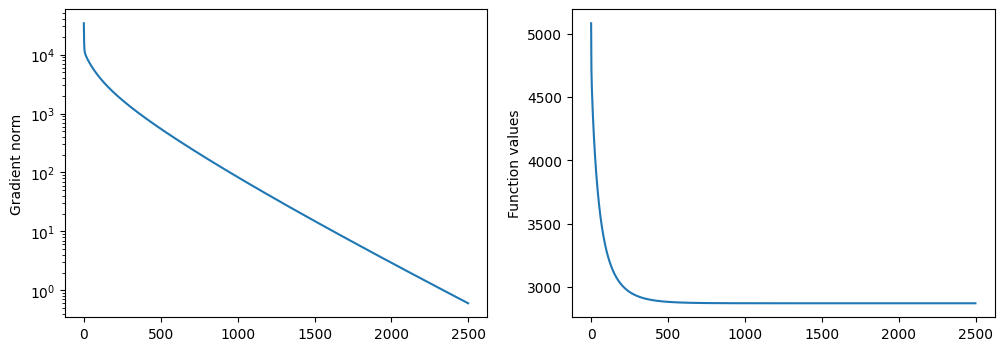

In [31]:
# let us plot the result 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].plot(gradient_norms_GD)
axes[0].semilogy()
axes[0].set_ylabel("Gradient norm")

axes[1].plot(f_values_GD)
axes[1].set_ylabel("Function values")

In [32]:
# Question 3.6 

test_error_l2 = (1/b_test.shape[0])*np.linalg.norm(A_test@w_GD - b_test)**2
print("Test error for l2 penalized solution : ", test_error_l2)

Test error for l2 penalized solution :  61.521677629423245


What do you observe ?

The error is much smaller than the previous one thus this method is more efficient

For a faster algorithm, we could implement accelerated gradient descent.

In [33]:
# Question 3.7 (optional) 
import time

def accelerated_gradient_descent(func, w0, gamma, max_iter,lambda_l2):
     start_time = time.time()
     w = w0.copy()
     y = [w]
     p = False
     f_values = []
     gradient_norms = []

     for t in range(max_iter):
        y.append(w-gamma*grad_f(w,lambda_l2))
        w=y[t+1]+(t/(t+3))*(y[t+1]-y[t])
        f_values.append(f(w,lambda_l2))
        gradient_norms.append(np.linalg.norm(grad_f(w,lambda_l2)))
        if gradient_norms[t] <= 1 and p==False:
            print("It takes " + str(t)+ " Steps in order to have gradient_norms <= 1 ")
            p=True
     end_time = time.time() 
     ti=end_time - start_time
        
     return w, f_values, gradient_norms,ti

In [34]:
# COMPLETE HERE
w0 = np.zeros(A.shape[1])
step_size = 1/L
max_iter = 2500

w_AGD, f_values_AGD, gradient_norms_AGD,time = accelerated_gradient_descent(f, w0, step_size, max_iter,lambda_l2)

It takes 1079 Steps in order to have gradient_norms <= 1 


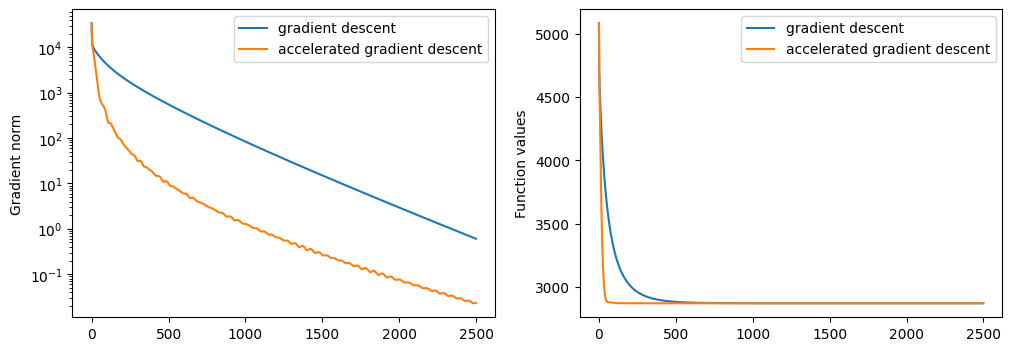

In [35]:
# let us plot the result 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].plot(gradient_norms_GD, label = "gradient descent")
axes[0].plot(gradient_norms_AGD, label = "accelerated gradient descent")
axes[0].semilogy()
axes[0].set_ylabel("Gradient norm")
axes[0].legend()

axes[1].plot(f_values_GD, label = "gradient descent")
axes[1].plot(f_values_AGD, label = "accelerated gradient descent")
axes[1].set_ylabel("Function values")
axes[1].legend()

What do you observe regarding the convergence speed ?

The speed is much higher than the previous about x2.3 to reach the gradient_norms <= 1 

## 4. Adding $\ell_1$ regularization (Lasso)

We now solve 

$$
\min_{w \in \mathbb{R}^d} \frac 12 \|Aw-b\|_2^2 + \lambda \|w\|_1
$$

# Question 4.1

The function is given by:
$$
F_2(w) = \frac{1}{2} \| A w - b \|^2_2 + \lambda \| w \|_1
$$

We want to rewrite this function as $ F_2 = f_2 + g_2 $, where $ f_2 $ is differentiable and the proximal operator of $ g_2  is easy to compute.

- The first term $ \frac{1}{2} \| A w - b \|^2_2 $ is differentiable so it's $ f_2(w) $.
- The second term $ \lambda \| w \|_1 $ is not differentiable so this term is written as $ g_2(w) $.

So, we have:
$$
f_2(w) = \frac{1}{2} \| A w - b \|^2_2
$$
and
$$
g_2(w) = \lambda \| w \|_1
$$


The proximal operator of $ g_2(w) $ is defined as:
$$
\text{prox}_{g_2}(v) = \arg \min_{w} \left( \frac{1}{2} \| w - v \|^2_2 + \lambda \| w \|_1 \right)
$$
it can be computed element-wise as:
$$
\text{prox}_{g_2}(v_i) = \text{sgn}(v_i) \max(|v_i| - \lambda, 0)
$$
where $ v_i $ are the components of the vector $ v $.


the gradient of $ f_2(w) $ is :
$$
\nabla f_2(w) = A^T (A w - b)
$$




In [38]:
lambda_l1 = 1e3
import time
## Question 4.2
def prox_l1(x, mu, lambda_l1):
    """compute the proximal operator of mu * |x|_1
    """
    # COMPLETE HERE
    return np.sign(x) * np.maximum(np.abs(x) - mu*lambda_l1, 0)

def F2(w,lambda_l1):
    
    return 0.5*np.linalg.norm(A@w-b)**2 + lambda_l1*np.linalg.norm(w,1)

def grad_f2(w):
   
    return(A.T@(A@w-b))

def proximal_gradient_descent(func, w0, gamma, max_iter,lambda_l1):
    start_time = time.time()
    w = w0.copy()
    
    f_values = []
    gradient_norms = []
    for t in range(max_iter):
        # COMPLETE HERE
        w=prox_l1((w-gamma*grad_f2(w)),gamma,lambda_l1)
        f_values.append(F2(w,lambda_l1))
        gradient_norms.append(np.linalg.norm(grad_f2(w)))
    end_time = time.time()
    ti=end_time-start_time
        
    return (w, f_values, gradient_norms,ti)

In [39]:
# COMPLETE HERE
w0 = np.zeros(A.shape[1])
step_size = 1/L
max_iter = 2500

w_P, f_values_P, gradient_norms_P,time = proximal_gradient_descent(F2, w0, step_size, max_iter,lambda_l1)

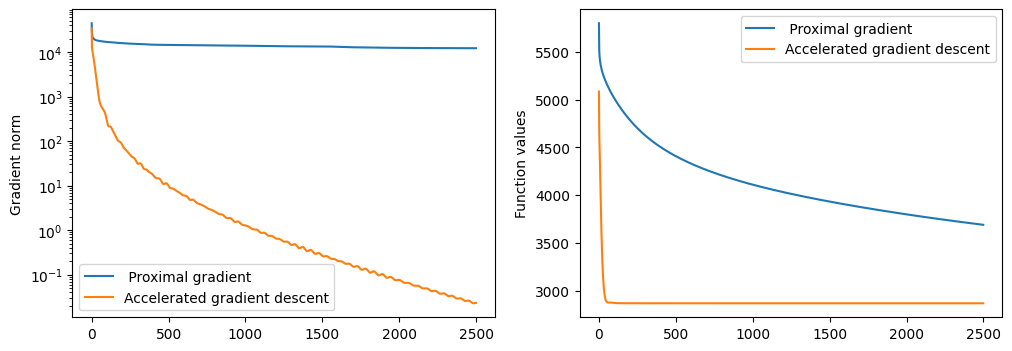

In [40]:
# let us plot the result 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].plot(gradient_norms_P, label = " Proximal gradient")
axes[0].plot(gradient_norms_AGD, label = "Accelerated gradient descent")
axes[0].semilogy()
axes[0].set_ylabel("Gradient norm")
axes[0].legend()

axes[1].plot(f_values_P, label = " Proximal gradient")
axes[1].plot(f_values_AGD, label = "Accelerated gradient descent")
axes[1].set_ylabel("Function values")
axes[1].legend()

In [41]:
# Question 4.3

test_error_l1 = (1/b_test.shape[0])*np.linalg.norm(A_test@w_P - b_test)**2
print("Test error for l1 penalized solution : ", test_error_l1)

Test error for l1 penalized solution :  4.14206324934535


Compare with the previous test errors. What do you observe?

This error is the smallest one and it's very close to 0 than the other ones

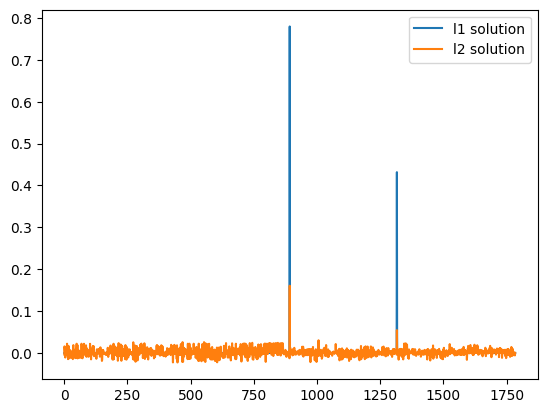

In [42]:
# Let us examine the solution

plt.plot(w_P, label = "l1 solution")
plt.plot(w_GD, label = "l2 solution")

plt.legend()

We have only two values different to zeros for the l1 solution whereas the l2 solutions have nozero values everywhere 

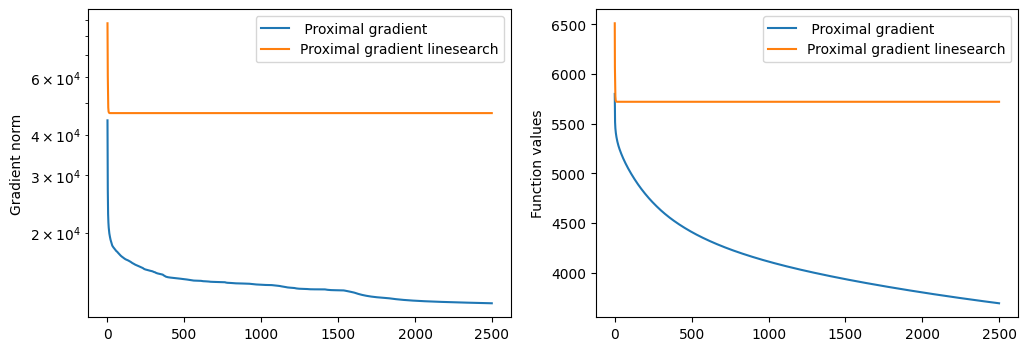

In [45]:
# Question 4.4

def proximal_gradient_descent_linesearch(func, w0, max_iter,lambda_l1):
    
    w = w0.copy()
    gamma = 0
    f_values = []
    gradient_norms = []
    a=0.5
    b= 1000
    for t in range(max_iter):
       l=0
       y=b*a**l
       xl=w-y*grad_f(w,lambda_l1)
       while F2(xl,lambda_l1) > F2(w,lambda_l1) + 0.5*grad_f(w,lambda_l1)@(xl-w) :
        l=l+1
        y=b*a**l
        xl=w-y*grad_f(w,lambda_l1)
    
       gamma_k = y
        
       w=prox_l1((w-gamma_k*grad_f2(w)),gamma_k,lambda_l1)
    
       f_values.append(F2(w,lambda_l1))
       gradient_norms.append(np.linalg.norm(grad_f2(w)))
    
    return (w, f_values, gradient_norms)


w0 = np.zeros(A.shape[1])
max_iter = 2500

w_Ps, f_values_Ps, gradient_norms_Ps = proximal_gradient_descent_linesearch(f, w0, max_iter,lambda_l1)

# let us plot the result 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].plot(gradient_norms_P, label = " Proximal gradient")
axes[0].plot(gradient_norms_Ps, label = "Proximal gradient linesearch")
axes[0].semilogy()
axes[0].set_ylabel("Gradient norm")
axes[0].legend()

axes[1].plot(f_values_P, label = " Proximal gradient")
axes[1].plot(f_values_Ps,label = "Proximal gradient linesearch")
axes[1].set_ylabel("Function values")
axes[1].legend()

In [46]:
test_error_l1 = (1/b_test.shape[0])*np.linalg.norm(A_test@w_Ps - b_test)**2
print("Test error for l1 penalized solution : ", test_error_l1)

Test error for l1 penalized solution :  27.47071362371241


The linesearch method is way longer than the normal so it's not good compared to the fixed step size  and the error is much bigger than the step sized

## Tuning the penalization parameter

How to find the best solution among all those that were comptued? How to choose the penalization parameter $\lambda$?

In [50]:

import time 

def mean_squared_error(w):
    
    return (1/b_test.shape[0])*0.5*np.linalg.norm(A_test@w - b_test)**2

def grid_search(A_valid, b_valid, rho0, a, K, model_type):
   
    best_mse = float('inf')
    best_w = None
    best_rho = None

    for k in range(K + 1):
        
        rho = rho0 * (a ** k)
    
        if model_type == 'ridge':
            w_rho,q,s,time = accelerated_gradient_descent(f,w0,1/L,2500,rho)
        elif model_type == 'lasso':
            w_rho,q,s,time = proximal_gradient_descent(f,w0,1/L,2500,rho)
        
        mse = mean_squared_error(w_rho)
        
        if mse < best_mse:
            best_mse = mse
            best_w = w_rho
            best_rho = rho
            best_time=time

    return best_w, best_rho, best_mse,best_time


rho0 = 50000
a = 0.5     
K = 10 
     
model_type = 'ridge'  
best_w, best_rho, best_mse,best_time = grid_search(A_test, b_test, rho0, a, K, model_type)
print("Modèle : Ridge")
print(f"Best rho: {best_rho}")
print(f"Best time: {best_time}")
print(f"Best model weights: {best_w}")
print(f"Best MSE on validation set: {best_mse}")

model_type = 'lasso'  
best_w, best_rho, best_mse,best_time = grid_search(A_test, b_test, rho0, a, K, model_type)
print("Modèle : Lasso")
print(f"Best rho: {best_rho}")
print(f"Best time: {best_time}")
print(f"Best model weights: {best_w}")
print(f"Best MSE on validation set: {best_mse}")


It takes 364 Steps in order to have gradient_norms <= 1 
It takes 592 Steps in order to have gradient_norms <= 1 
It takes 932 Steps in order to have gradient_norms <= 1 
It takes 1397 Steps in order to have gradient_norms <= 1 
It takes 2021 Steps in order to have gradient_norms <= 1 
Modèle : Ridge
Best rho: 50000.0
Best time: 2.772731065750122
Best model weights: [-0.00071267  0.00542028  0.00369838 ... -0.00017828  0.0020487
 -0.00226377]
Best MSE on validation set: 7.446746950933883
Modèle : Lasso
Best rho: 781.25
Best time: 2.4702868461608887
Best model weights: [ 0.  0.  0. ... -0.  0. -0.]
Best MSE on validation set: 1.77396075431433


Lasso much quicker and has a smaller error than the Ridge 
Best lambda for Lasso = 781.25